The plots showing P (Y = 1|X = x), e(x) = P (S =
1|Y = 1, X = x) and P (S = 1|X = x) were generated as
follows. Variable x was generated from uniform distribution
on [−3, 5]. Probability P (Y = 1|X = x) = fsigmoid(x) and
the propensity score function was:
1. Figure 2 (a): e(x) = fsigmoid(P (Y = 1|X = x))
2. Figure 2 (b): e(x) = fsigmoid(−0.5 · P (Y = 1|X = x))
3. Figure 2 (c): e(x) = fsigmoid(−0.2x)
Probability for S is given using the formula:
P (S = 1|X = x) = e(x)P (Y = 1|X = x

This notebook generates the figure in Section 3 of the paper.

In [1]:
from scipy.special import digamma
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return  1/(1 + np.exp(-x))
    

In [3]:
x = np.linspace(-3,5,1000)
py = sigmoid(x)
e = [sigmoid(py),
     sigmoid(-0.5*py),
     sigmoid(-0.2*x)]
ps = [ei*py for ei in e]

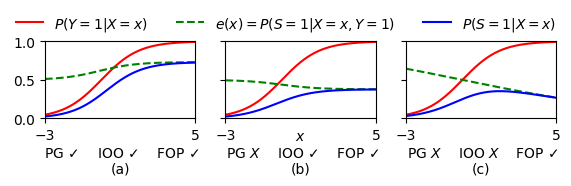

In [5]:

# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

fig, axes = plt.subplots(1,3, sharey=True, sharex=True, figsize=[6.6,1])
# fig.suptitle('title')
for i in range(len(ps)):
    axes[i].plot(x,py, 'r-', label=r'$P(Y=1|X=x)$')
    axes[i].plot(x,e[i], 'g--',label=r'$e(x)=P(S=1|X=x,Y=1)$')
    axes[i].plot(x,ps[i], 'b-', label=r'$P(S=1|X=x)$')

axes[0].set_yticks([0,0.5,1])
axes[0].set_ylim([0,1])
axes[0].set_xticks([-3,5])
axes[0].set_xlim([-3,5])
axes[0].set_xlabel("\n" + r" PG $\checkmark$    IOO $\checkmark$    FOP $\checkmark$" + "\n(a)", labelpad=-9)





axes[1].set_xlabel(r'$x$'+"\n"+r" PG $X$    IOO $\checkmark$    FOP $\checkmark$"+"\n(b)", labelpad=-9)
axes[2].set_xlabel("\n"+r" PG $X$    IOO $X$    FOP $\checkmark$"+"\n(c)", labelpad=-9)
axes[1].legend(loc='lower center', bbox_to_anchor=(0.4, .95),
          ncol=3, fancybox=True, shadow=False, edgecolor="1",framealpha=0)


plt.savefig('assumptions.pdf', bbox_inches="tight")
    